In [ ]:
! git clone https://github.com/XuezheMax/NeuroNLP2.git

Cloning into 'NeuroNLP2'...
remote: Enumerating objects: 4482, done.
remote: Total 4482 (delta 0), reused 0 (delta 0), pack-reused 4482
Receiving objects: 100% (4482/4482), 755.91 KiB | 5.56 MiB/s, done.
Resolving deltas: 100% (3180/3180), done.


In [ ]:
! wget https://perso.limsi.fr/pz/upsay/QUAERO_FrenchPress-w2v.vec.gz

--2022-02-05 12:44:13--  https://perso.limsi.fr/pz/upsay/QUAERO_FrenchPress-w2v.vec.gz
Resolving perso.limsi.fr (perso.limsi.fr)... 129.175.134.198
Connecting to perso.limsi.fr (perso.limsi.fr)|129.175.134.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19637065 (19M) [application/x-gzip]
Saving to: ‘QUAERO_FrenchPress-w2v.vec.gz’

QUAERO_FrenchPress- 100%[===================>]  18.73M  13.9MB/s    in 1.3s    

2022-02-05 12:44:15 (13.9 MB/s) - ‘QUAERO_FrenchPress-w2v.vec.gz’ saved [19637065/19637065]



In [ ]:
! wget https://perso.limsi.fr/neveol/TP_ISD2020.zip
! unzip TP_ISD2020.zip

--2022-02-05 12:44:15--  https://perso.limsi.fr/neveol/TP_ISD2020.zip
Resolving perso.limsi.fr (perso.limsi.fr)... 129.175.134.198
Connecting to perso.limsi.fr (perso.limsi.fr)|129.175.134.198|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11397405 (11M) [application/zip]
Saving to: ‘TP_ISD2020.zip’

TP_ISD2020.zip      100%[===================>]  10.87M  10.4MB/s    in 1.0s    

2022-02-05 12:44:17 (10.4 MB/s) - ‘TP_ISD2020.zip’ saved [11397405/11397405]

Archive:  TP_ISD2020.zip
   creating: QUAERO_FrenchMed/
   creating: QUAERO_FrenchMed/EMEA/
  inflating: QUAERO_FrenchMed/EMEA/EMEAdev_layer1_ID.conll  
  inflating: QUAERO_FrenchMed/EMEA/EMEAtest_layer1_ID.conll  
  inflating: QUAERO_FrenchMed/EMEA/EMEAtrain_layer1_ID.conll  
   creating: QUAERO_FrenchMed/MEDLINE/
  inflating: QUAERO_FrenchMed/MEDLINE/MEDLINEdev_layer1_ID.conll  
  inflating: QUAERO_FrenchMed/MEDLINE/MEDLINEtest_layer1_ID.conll  
  inflating: QUAERO_FrenchMed/MEDLINE/MEDLINEtrain_layer1_ID

## Changes added to ner.py for easy result collection

In [ ]:
! cd NeuroNLP2 && git diff experiments/ner.py

diff --git a/experiments/ner.py b/experiments/ner.py
index 0fb6ce6..e9c800a 100644
--- a/experiments/ner.py
+++ b/experiments/ner.py
@@ -220,6 +220,8 @@ def main():
     result_path = os.path.join(model_path, 'tmp')
     if not os.path.exists(result_path):
         os.makedirs(result_path)
+
+    res_test_prec, res_test_rec, res_test_fsc = [], [], []
     for epoch in range(1, num_epochs + 1):
         start_time = time.time()
         train_loss = 0.
@@ -297,11 +299,14 @@ def main():
                 scorefile = os.path.join(result_path, "score_test%d" % epoch)
                 test_acc, test_precision, test_recall, test_f1 = eval(data_test, network, writer, outfile, scorefile, device)
                 print('test acc: %.2f%%, precision: %.2f%%, recall: %.2f%%, F1: %.2f%%' % (test_acc, test_precision, test_recall, test_f1))
+                
                 patient = 0
             else:
                 patient += 1
             print('-' * 100)
-
+            res_test_prec.append(t

## Preparation experiments execution, configs etc

In [ ]:
! pip install torch==1.4.0 overrides --force-reinstall
! mkdir NeuroNLP2/models
! cd NeuroNLP2/experiments/ && python ner.py --help

     |████████████████████████████████| 753.4 MB 6.6 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
usage: ner.py [-h] --config CONFIG [--num_epochs NUM_EPOCHS]
              [--batch_size BATCH_SIZE] [--loss_type {sentence,token}] --optim
              {sgd,adam} [--learning_rate LEARNING_RATE] [--lr_decay LR_DECAY]
              [--amsgrad] [--grad_clip GRAD_CLIP] [--warmup_steps N]
              [--weight_dec

In [ ]:
import pathlib
import textwrap

ROOT_DIR = pathlib.Path("NeuroNLP2/experiments/")
SCRIPT_FILE = ROOT_DIR / "run_script.sh"
CONFIG_FILE = ROOT_DIR / "quaero-100-demi.json"

model_name = "test_model"

In [ ]:
config = """\
{
  "crf": false,
  "bigram": true,
  "embedd_dim": 100,
  "char_dim": 30,
  "rnn_mode": "LSTM",
  "num_layers":1,
  "hidden_size": 128,
  "out_features": 64,
  "dropout": "std",
  "p_in": 0.33,
  "p_out": 0.5,
  "p_rnn": [0.33, 0.5],
  "activation": "elu"
}
"""

CONFIG_FILE.write_text(config)

259

In [ ]:
def get_run_script(
    num_tokens=10e3,
    num_epochs=10,
    batch_size=16,
    learning_rate=1e-2,
    model_name="test_model",
):
    return f"""\
#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py \
--config "quaero-100-demi.json" \
--num_epochs {num_epochs} \
--batch_size {batch_size} \
--loss_type sentence \
--optim sgd \
--learning_rate {learning_rate} \
--lr_decay 0.99999 \
--grad_clip 0.0 \
--warmup_steps 10 \
--weight_decay 0.0 \
--unk_replace 0.0 \
--embedding sskip \
--embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" \
--model_path "../models/{model_name}" \
--train <(head -n {int(num_tokens)} "../../QUAERO_FrenchPress/fra4_ID.train") \
--dev "../../QUAERO_FrenchPress/fra4_ID.dev" \
--test "../../QUAERO_FrenchPress/fra4_ID.test"
"""

## 10k tokens

In [ ]:
script = get_run_script(num_tokens=10e3, num_epochs=10, model_name="100k_10_epoch")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 10 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/100k_10_epoch" --train <(head -n 10000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/100k_10_epoch', num_epochs=10, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight

In [ ]:
script = get_run_script(num_tokens=10e3, num_epochs=20)
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 20 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/test_model" --train <(head -n 10000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/test_model', num_epochs=20, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay

In [ ]:
script = get_run_script(num_tokens=10e3, num_epochs=30)
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 30 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/test_model" --train <(head -n 10000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/test_model', num_epochs=30, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay

In [ ]:
script = get_run_script(num_tokens=10e3, num_epochs=40)
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 40 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/test_model" --train <(head -n 10000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/test_model', num_epochs=40, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay

In [ ]:
# Patch to print all the results at once
# 223 
res_test_prec, res_test_rec, res_test_fsc = [], [], []
# 303-305
res_test_prec.append(test_precision)
res_test_rec.append(test_recall)
res_test_fsc.append(test_f1)
# 320-322
print("Test precisions", res_test_prec)
print("Test recall", res_test_rec)
print("Test F1", res_test_fsc)


In [ ]:
# tests results, copy-pasted from the experiments below
# summary results as a list was printed at the end of each experiment
from dataclasses import dataclass
from typing import List

@dataclass
class ExpResults:
    precision: List[float]
    recall: List[float]
    f1: List[float]

lstm_1_128 = {
    "token_10k_epoch_10": ExpResults(
        precision=[0.0, 19.53, 9.83, 23.04, 23.84, 23.84, 38.42, 31.32, 31.32, 31.32],
        recall=[0.0, 1.87, 1.3, 2.58, 4.82, 4.82, 9.22, 20.62, 20.62, 20.62],
        f1=[0.0, 3.42, 2.3, 4.64, 8.02, 8.02, 14.87, 24.87, 24.87, 24.87],
    ),
    "token_50k_epoch_10": ExpResults(
        precision=[8.68, 30.07, 46.79, 46.59, 46.05, 46.05, 53.13, 53.7, 52.01, 52.01],
        recall=[1.08, 7.74, 31.62, 44.13, 45.32, 45.32, 44.24, 44.9, 45.89, 45.89],
        f1=[1.92, 12.31, 37.74, 45.32, 45.68, 45.68, 48.28, 48.9, 48.76, 48.76],
    ),
    "token_100k_epoch_10": ExpResults(
        precision=[47.05, 46.57, 54.3, 47.07, 53.34, 51.51, 53.72, 55.79, 53.75, 53.75],
        recall=[15.17, 44.61, 40.84, 44.38, 42.85, 49.32, 49.15, 48.38, 50.23, 50.23],
        f1=[22.95, 45.57, 46.62, 45.69, 47.52, 50.39, 51.33, 51.82, 51.93, 51.93],
    ),
    "token_500k_epoch_10": ExpResults(
        precision=[59.08, 59.08, 62.33, 64.04, 64.94, 62.67, 67.09, 68.79, 68.79, 68.79],
        recall=[48.55, 48.55, 55.47, 55.42, 56.27, 56.89, 59.5, 58.62, 58.62, 58.62],
        f1=[53.3, 53.3, 58.7, 59.42, 60.29, 59.64, 63.07, 63.3, 63.3, 63.3],
    ),
    "token_1M_epoch_10": ExpResults(
        precision=[54.75, 63.79, 66.79, 66.79, 66.79, 69.7, 69.7, 71.31, 71.31, 70.16],
        recall=[48.72, 54.76, 58.45, 61.6, 61.6, 61.85, 61.85, 62.02, 62.02, 62.14],
        f1=[51.56, 58.93, 62.34, 64.09, 64.09, 65.54, 65.54, 66.34, 66.34, 65.9],
    ),
    "token_10k_epoch_20": ExpResults(
        precision=[0.0, 4.07, 4.07, 28.67, 25.0, 25.06, 35.05, 52.52, 52.61, 52.61, 43.65, 51.38, 51.38, 51.38, 51.38, 51.38, 51.38, 51.38, 51.38, 55.52],
        recall=[0.0, 0.31, 0.31, 2.38, 3.8, 5.93, 7.71, 21.58, 36.56, 36.56, 42.2, 40.56, 40.56, 40.56, 40.56, 40.56, 40.56, 40.56, 40.56, 39.25],
        f1=[0.0, 0.58, 0.58, 4.4, 6.6, 9.59, 12.65, 30.59, 43.14, 43.14, 42.91, 45.33, 45.33, 45.33, 45.33, 45.33, 45.33, 45.33, 45.33, 45.99],
    ),
    "token_50k_epoch_20": ExpResults(
        precision=[23.02, 35.28, 48.07, 54.65, 54.65, 48.71, 53.06, 52.74, 52.74, 52.74, 52.74, 52.74, 54.24, 54.24, 55.79, 55.25, 55.25, 55.25, 55.25, 55.25],
        recall=[5.62, 7.03, 37.01, 41.49, 41.49, 44.47, 43.73, 46.91, 46.91, 46.91, 46.91, 46.91, 50.09, 50.09, 48.24, 49.38, 49.38, 49.38, 49.38, 49.38],
        f1=[9.03, 11.73, 41.82, 47.17, 47.17, 46.49, 47.95, 49.65, 49.65, 49.65, 49.65, 49.65, 52.08, 52.08, 51.74, 52.15, 52.15, 52.15, 52.15, 52.15],
    ),
    "token_100k_epoch_20": ExpResults(
        precision=[41.95, 57.12, 46.88, 55.6, 56.53, 55.6, 55.6, 53.61, 53.61, 53.61, 53.61, 54.73, 54.73, 54.73, 59.26, 57.66, 57.66, 57.66, 57.66, 56.45],
        recall=[5.98, 39.25, 42.2, 44.9, 48.47, 47.62, 47.62, 49.66, 49.66, 49.66, 49.66, 49.38, 49.38, 49.38, 51.82, 52.41, 52.41, 52.41, 52.41, 53.35],
        f1=[10.47, 46.53, 44.42, 49.68, 52.19, 51.3, 51.3, 51.56, 51.56, 51.56, 51.56, 51.92, 51.92, 51.92, 55.29, 54.91, 54.91, 54.91, 54.91, 54.86],
    ),
    "token_10k_epoch_30": ExpResults(
        precision=[0.0, 9.52, 9.52, 26.65, 26.65, 35.22, 34.28, 42.58, 45.27, 53.06, 54.53, 52.58, 52.58, 52.58, 52.58, 52.18, 52.18, 52.17, 52.17, 52.17, 52.17, 52.17, 52.17, 56.05, 56.05, 56.05, 56.05, 56.01, 56.01, 56.01],
        recall=[0.0, 0.51, 0.51, 4.0, 4.0, 6.52, 6.15, 10.41, 16.85, 29.27, 33.81, 37.29, 37.29, 37.29, 37.29, 35.62, 35.62, 43.73, 43.73, 43.73, 43.73, 43.73, 43.73, 43.76, 43.76, 43.76, 43.76, 43.62, 43.62, 43.62],
        f1=[0.0, 0.97, 0.97, 6.95, 6.95, 11.01, 10.44, 16.73, 24.56, 37.73, 41.74, 43.64, 43.64, 43.64, 43.64, 42.34, 42.34, 47.58, 47.58, 47.58, 47.58, 47.58, 47.58, 49.15, 49.15, 49.15, 49.15, 49.04, 49.04, 49.04],
    ),
    "token_50k_epoch_30": ExpResults(
        precision=[23.86, 47.39, 48.18, 45.04, 45.04, 53.54, 52.98, 56.26, 56.26, 54.83, 55.35, 53.44, 53.44, 54.47, 53.11, 59.04, 59.04, 54.93, 54.93, 52.34, 52.34, 56.55, 56.55, 56.55, 56.55, 56.55, 56.55, 56.55, 56.55, 59.08],
        recall=[2.38, 12.88, 37.15, 43.56, 43.56, 43.31, 45.35, 45.77, 45.77, 46.71, 45.8, 46.28, 46.28, 47.39, 48.98, 46.48, 46.48, 47.84, 47.84, 50.68, 50.68, 50.17, 50.17, 50.17, 50.17, 50.17, 50.17, 50.17, 50.17, 49.01],
        f1=[4.33, 20.25, 41.95, 44.29, 44.29, 47.88, 48.87, 50.48, 50.48, 50.44, 50.12, 49.6, 49.6, 50.68, 50.96, 52.02, 52.02, 51.14, 51.14, 51.5, 51.5, 53.17, 53.17, 53.17, 53.17, 53.17, 53.17, 53.17, 53.17, 53.57],
    ),
    "token_100k_epoch_30": ExpResults(
        precision=[42.69, 51.02, 51.02, 50.96, 48.65, 52.76, 52.76, 52.76, 52.76, 53.04, 51.6, 58.05, 58.05, 58.05, 58.05, 53.44, 52.53, 53.55, 52.67, 52.04, 55.51, 54.09, 56.06, 56.06, 53.06, 53.06, 53.06, 53.06, 53.06, 53.06],
        recall=[13.58, 43.08, 43.08, 45.83, 47.19, 47.73, 47.73, 47.73, 47.73, 50.17, 49.4, 51.05, 51.05, 51.05, 51.05, 53.03, 52.44, 53.69, 54.91, 53.52, 52.27, 54.74, 54.34, 54.34, 54.17, 54.17, 54.17, 54.17, 54.17, 54.17],
        f1=[20.61, 46.72, 46.72, 48.26, 47.91, 50.12, 50.12, 50.12, 50.12, 51.57, 50.48, 54.32, 54.32, 54.32, 54.32, 53.24, 52.48, 53.62, 53.76, 52.77, 53.84, 54.41, 55.18, 55.18, 53.61, 53.61, 53.61, 53.61, 53.61, 53.61],
    ),
    "token_500k_epoch_30": ExpResults(
        precision=[58.75, 59.4, 61.71, 65.63, 64.18, 64.23, 64.23, 64.07, 65.51, 67.17, 67.17, 67.17, 67.65, 66.86, 66.86, 66.86, 66.86, 69.25, 68.34, 68.25, 68.25, 68.25, 68.25, 68.25, 68.54, 69.18, 68.4, 68.4, 68.4, 68.4],
        recall=[50.82, 50.74, 53.12, 55.67, 54.17, 58.25, 58.25, 59.27, 61.2, 60.18, 60.18, 60.18, 60.49, 61.51, 61.51, 61.51, 61.51, 62.28, 62.25, 62.56, 62.56, 62.56, 62.56, 62.56, 62.39, 62.25, 63.24, 63.24, 63.24, 63.24],
        f1=[54.5, 54.73, 57.09, 60.24, 58.75, 61.09, 61.09, 61.58, 63.28, 63.49, 63.49, 63.49, 63.87, 64.08, 64.08, 64.08, 64.08, 65.58, 65.15, 65.29, 65.29, 65.29, 65.29, 65.29, 65.32, 65.53, 65.72, 65.72, 65.72, 65.72],
    ),
    "token_10k_epoch_40": ExpResults(
        precision=[0.0, 4.6, 26.67, 29.04, 29.04, 31.89, 41.01, 41.01, 40.43, 49.02, 49.02, 52.62, 50.97, 53.3, 53.3, 53.3, 53.3, 54.6, 54.6, 54.6, 54.6, 53.18, 53.18, 53.18, 53.18, 53.18, 53.26, 53.26, 53.26, 53.26, 53.26, 53.26, 53.26, 56.54, 56.54, 55.18, 55.18, 55.18, 55.18, 55.18],
        recall=[0.0, 0.34, 2.72, 4.23, 4.23, 14.04, 10.41, 10.41, 27.42, 22.77, 22.77, 29.35, 33.49, 39.17, 39.17, 39.17, 39.17, 33.86, 33.86, 33.86, 33.86, 44.13, 44.13, 44.13, 44.13, 44.13, 44.24, 44.24, 44.24, 44.24, 44.24, 44.24, 44.24, 46.45, 46.45, 46.23, 46.23, 46.23, 46.23, 46.23],
        f1=[0.0, 0.63, 4.94, 7.38, 7.38, 19.5, 16.6, 16.6, 32.68, 31.1, 31.1, 37.68, 40.42, 45.15, 45.15, 45.15, 45.15, 41.8, 41.8, 41.8, 41.8, 48.23, 48.23, 48.23, 48.23, 48.23, 48.33, 48.33, 48.33, 48.33, 48.33, 48.33, 48.33, 51.0, 51.0, 50.31, 50.31, 50.31, 50.31, 50.31],
    ),
    "token_50k_epoch_40": ExpResults(
        precision=[14.95, 44.87, 54.05, 56.66, 55.43, 56.66, 55.2, 54.96, 54.96, 53.86, 54.2, 54.2, 54.2, 54.03, 59.44, 59.44, 56.52, 56.52, 56.4, 56.4, 55.5, 55.5, 55.5, 55.5, 55.5, 50.63, 50.63, 54.34, 54.34, 54.34, 54.34, 54.34, 56.88, 56.88, 56.88, 56.88, 56.88, 56.88, 56.88, 56.88],
        recall=[1.73, 10.66, 38.63, 42.71, 42.71, 42.09, 46.06, 45.69, 45.69, 46.34, 49.63, 49.63, 49.63, 48.33, 47.59, 47.59, 48.67, 48.67, 49.6, 49.6, 49.8, 49.8, 49.8, 49.8, 49.8, 52.21, 52.21, 50.62, 50.62, 50.62, 50.62, 50.62, 51.84, 51.84, 51.84, 51.84, 51.84, 51.84, 51.84, 51.84],
        f1=[3.1, 17.23, 45.05, 48.71, 48.25, 48.3, 50.22, 49.9, 49.9, 49.82, 51.81, 51.81, 51.81, 51.02, 52.86, 52.86, 52.3, 52.3, 52.78, 52.78, 52.5, 52.5, 52.5, 52.5, 52.5, 51.41, 51.41, 52.42, 52.42, 52.42, 52.42, 52.42, 54.24, 54.24, 54.24, 54.24, 54.24, 54.24, 54.24, 54.24],
    ),
    "token_100k_epoch_40": ExpResults(
        precision=[37.07, 47.07, 54.9, 56.3, 56.3, 55.87, 52.94, 58.54, 58.54, 58.54, 53.6, 53.29, 53.29, 53.29, 54.28, 54.28, 54.28, 54.28, 50.52, 50.52, 53.66, 53.66, 53.66, 53.66, 57.74, 57.74, 54.72, 54.72, 54.72, 54.72, 56.2, 52.03, 52.03, 52.03, 52.03, 52.03, 52.03, 55.8, 55.8, 55.8],
        recall=[6.75, 42.31, 45.09, 44.75, 44.75, 48.16, 48.75, 49.21, 49.21, 49.21, 50.62, 52.13, 52.13, 52.13, 52.69, 52.69, 52.69, 52.69, 52.38, 52.38, 54.11, 54.11, 54.11, 54.11, 52.69, 52.69, 55.84, 55.84, 55.84, 55.84, 54.76, 56.66, 56.66, 56.66, 56.66, 56.66, 56.66, 56.04, 56.04, 56.04],
        f1=[11.42, 44.56, 49.52, 49.87, 49.87, 51.73, 50.76, 53.47, 53.47, 53.47, 52.07, 52.7, 52.7, 52.7, 53.48, 53.48, 53.48, 53.48, 51.43, 51.43, 53.88, 53.88, 53.88, 53.88, 55.1, 55.1, 55.28, 55.28, 55.28, 55.28, 55.47, 54.25, 54.25, 54.25, 54.25, 54.25, 54.25, 55.92, 55.92, 55.92],
    ),
}

In [ ]:
import matplotlib.pyplot as plt

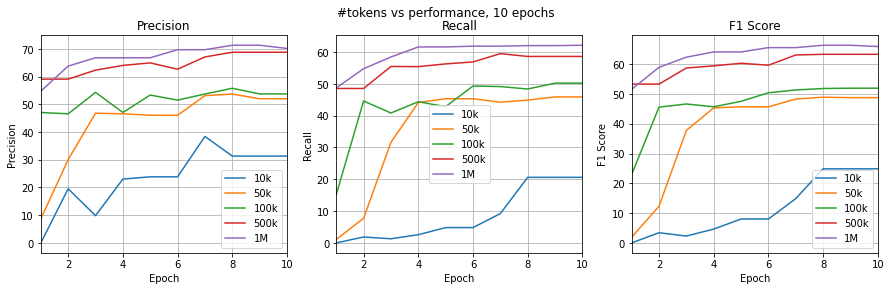

In [ ]:
# number of tokens vs performance for 10 epochs
fig = plt.figure(figsize=(15, 4))

experiments = ("token_10k_epoch_10", "token_50k_epoch_10", "token_100k_epoch_10", "token_500k_epoch_10", "token_1M_epoch_10")
legends = ("10k", "50k", "100k", "500k", "1M")
plt.subplot(1, 3, 1)
x = list(range(1, 11))
for exp in experiments:
    y = lstm_1_128[exp]
    plt.plot(x, y.precision)
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Precision")
plt.grid()
plt.xlim([1, 10])
plt.legend(legends)

plt.subplot(1, 3, 2)
for exp in experiments:
    y = lstm_1_128[exp]
    plt.plot(x, y.recall)
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall")
plt.grid()
plt.xlim([1, 10])
plt.legend(legends)

plt.subplot(1, 3, 3)
for exp in experiments:
    y = lstm_1_128[exp]
    plt.plot(x, y.f1)
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("F1 Score")
plt.grid()
plt.xlim([1, 10])
plt.legend(legends)

fig.suptitle("#tokens vs performance, 10 epochs")
plt.show()

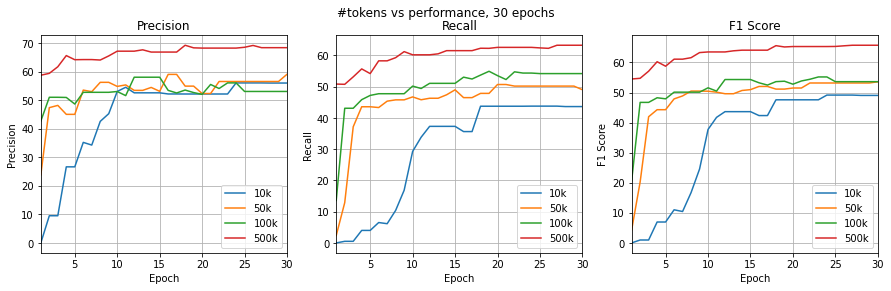

In [ ]:
# number of tokens vs performance for 30 epochs
fig = plt.figure(figsize=(15, 4))
fig.suptitle("#tokens vs performance, 30 epochs")
experiments = ("token_10k_epoch_30", "token_50k_epoch_30", "token_100k_epoch_30", "token_500k_epoch_30")
legends = ("10k", "50k", "100k", "500k")
plt.subplot(1, 3, 1)
x = list(range(1, 31))
for exp in experiments:
    y = lstm_1_128[exp]
    plt.plot(x, y.precision)
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Precision")
plt.grid()
plt.xlim([1, 30])
plt.legend(legends)

plt.subplot(1, 3, 2)
for exp in experiments:
    y = lstm_1_128[exp]
    plt.plot(x, y.recall)
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall")
plt.grid()
plt.xlim([1, 30])
plt.legend(legends)

plt.subplot(1, 3, 3)
for exp in experiments:
    y = lstm_1_128[exp]
    plt.plot(x, y.f1)
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("F1 Score")
plt.grid()
plt.xlim([1, 30])
plt.legend(legends)

plt.show()

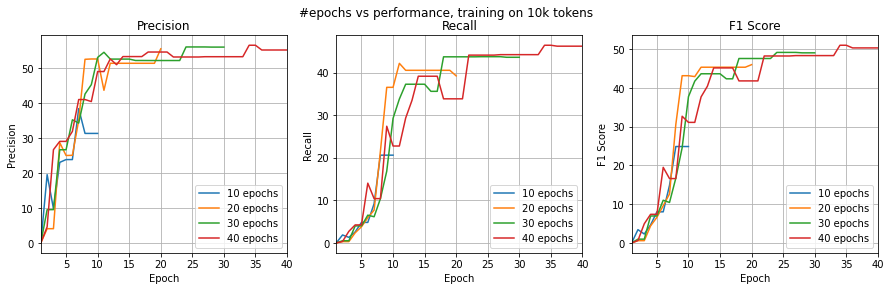

In [ ]:
# performance for 10k tokens
fig = plt.figure(figsize=(15, 4))
fig.suptitle("#epochs vs performance, training on 10k tokens")
experiments = ("token_10k_epoch_10", "token_10k_epoch_20", "token_10k_epoch_30", "token_10k_epoch_40")
legends = ("10 epochs", "20 epochs", "30 epochs", "40 epochs")
plt.subplot(1, 3, 1)

for exp in experiments:
    y = lstm_1_128[exp].precision
    x = list(range(1, len(y)+1))
    plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Precision")

plt.title("Precision")
plt.grid()
plt.xlim([1, 40])
plt.legend(legends)

plt.subplot(1, 3, 2)
for exp in experiments:
    y = lstm_1_128[exp].recall
    x = list(range(1, len(y)+1))
    plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall")
plt.grid()
plt.xlim([1, 40])
plt.legend(legends)

plt.subplot(1, 3, 3)
for exp in experiments:
    y = lstm_1_128[exp].f1
    x = list(range(1, len(y)+1))
    plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("F1 Score")
plt.grid()
plt.xlim([1, 40])
plt.legend(legends)

plt.show()

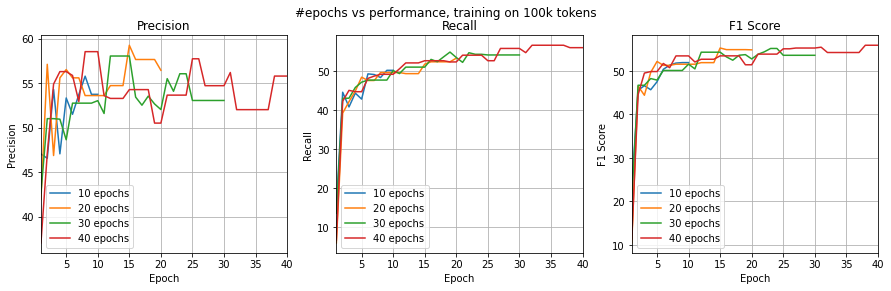

In [ ]:
# performance for 100k tokens
fig = plt.figure(figsize=(15, 4))
fig.suptitle("#epochs vs performance, training on 100k tokens")
experiments = ("token_100k_epoch_10", "token_100k_epoch_20", "token_100k_epoch_30", "token_100k_epoch_40")
legends = ("10 epochs", "20 epochs", "30 epochs", "40 epochs")
plt.subplot(1, 3, 1)

for exp in experiments:
    y = lstm_1_128[exp].precision
    x = list(range(1, len(y)+1))
    plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Precision")
plt.grid()
plt.xlim([1, 40])
plt.legend(legends)

plt.subplot(1, 3, 2)
for exp in experiments:
    y = lstm_1_128[exp].recall
    x = list(range(1, len(y)+1))
    plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall")
plt.grid()
plt.xlim([1, 40])
plt.legend(legends)

plt.subplot(1, 3, 3)
for exp in experiments:
    y = lstm_1_128[exp].f1
    x = list(range(1, len(y)+1))
    plt.plot(x, y)
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("F1 Score")
plt.grid()
plt.xlim([1, 40])
plt.legend(legends)

plt.show()

## 50k tokens

In [ ]:
script = get_run_script(num_tokens=50e3, num_epochs=10, model_name="50k_10_epoch")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 10 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/50k_10_epoch" --train <(head -n 50000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/50k_10_epoch', num_epochs=10, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_d

In [ ]:
script = get_run_script(num_tokens=50e3, num_epochs=20)
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 20 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/test_model" --train <(head -n 50000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/test_model', num_epochs=20, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay

In [ ]:
script = get_run_script(num_tokens=50e3, num_epochs=30)
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 30 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/test_model" --train <(head -n 50000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/test_model', num_epochs=30, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay

In [ ]:
script = get_run_script(num_tokens=50e3, num_epochs=40)
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 40 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/test_model" --train <(head -n 50000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/test_model', num_epochs=40, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay

## 100k tokens

In [ ]:
script = get_run_script(num_tokens=100e3, num_epochs=10, model_name="100k_10_epoch")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 10 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/100k_10_epoch" --train <(head -n 100000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/100k_10_epoch', num_epochs=10, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weigh

In [ ]:
script = get_run_script(num_tokens=100e3, num_epochs=20, model_name="100k_20_epoch")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 20 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/100k_20_epoch" --train <(head -n 100000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/100k_20_epoch', num_epochs=20, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weigh

In [ ]:
script = get_run_script(num_tokens=100e3, num_epochs=30, model_name="100k_30_epoch")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 30 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/100k_30_epoch" --train <(head -n 100000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/100k_30_epoch', num_epochs=30, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weigh

In [ ]:
script = get_run_script(num_tokens=100e3, num_epochs=40, model_name="100k_40_epoch")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 40 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/100k_40_epoch" --train <(head -n 100000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/100k_40_epoch', num_epochs=40, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weigh

## 500k tokens

In [ ]:
script = get_run_script(num_tokens=500e3, num_epochs=30, model_name="500k_30")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 30 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/500k_30" --train <(head -n 500000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/500k_30', num_epochs=30, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay=0.0)

In [ ]:
script = get_run_script(num_tokens=500e3, num_epochs=10, model_name="500k_10_epoch")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 10 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/500k_10_epoch" --train <(head -n 500000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/500k_10_epoch', num_epochs=10, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weigh

## 1M tokens

In [ ]:
script = get_run_script(num_tokens=10e6, num_epochs=10, model_name="1M_10_epoch")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 10 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/1M_10_epoch" --train <(head -n 10000000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/1M_10_epoch', num_epochs=10, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_

## Try with bigger network, LSTM 2 layers 256

In [ ]:
config = """\
{
  "crf": false,
  "bigram": true,
  "embedd_dim": 100,
  "char_dim": 30,
  "rnn_mode": "LSTM",
  "num_layers":2,
  "hidden_size": 256,
  "out_features": 64,
  "dropout": "std",
  "p_in": 0.33,
  "p_out": 0.5,
  "p_rnn": [0.33, 0.5],
  "activation": "elu"
}
"""

CONFIG_FILE.write_text(config)

259

In [ ]:
# Results copy-pasted from the experiments below 

lstm_2_256 = {
    "token_10k": ExpResults(
        precision=[0.0, 0.0, 0.0, 0.0, 0.0, 9.41, 10.19, 25.0, 27.02, 33.86, 33.86, 35.5, 39.08, 40.77, 42.22, 51.8, 44.16, 44.16, 44.16, 44.16],
        recall=[0.0, 0.0, 0.0, 0.0, 0.0, 0.23, 0.6, 3.66, 4.93, 6.1, 6.1, 5.42, 6.49, 8.39, 10.78, 19.17, 39.25, 39.25, 39.25, 39.25],
        f1=[0.0, 0.0, 0.0, 0.0, 0.0, 0.44, 1.13, 6.38, 8.35, 10.33, 10.33, 9.4, 11.14, 13.92, 17.17, 27.99, 41.56, 41.56, 41.56, 41.56],
    ),
    "token_50k": ExpResults(
        precision=[4.32, 25.27, 47.83, 49.35, 55.86, 56.28, 58.38, 58.38, 53.95, 53.95, 60.28, 60.28, 61.11, 56.55, 62.77, 62.77, 62.77, 62.77, 63.02, 63.02],
        recall=[0.2, 4.65, 12.51, 39.82, 43.14, 45.75, 45.15, 45.15, 46.11, 46.11, 46.91, 46.91, 47.99, 46.77, 49.43, 49.43, 49.43, 49.43, 51.33, 51.33],
        f1=[0.38, 7.86, 19.83, 44.07, 48.68, 50.47, 50.92, 50.92, 49.72, 49.72, 52.76, 52.76, 53.76, 51.2, 55.31, 55.31, 55.31, 55.31, 56.58, 56.58],
    ),
    "token_100k": ExpResults(
        precision=[23.4, 51.43, 51.66, 51.66, 54.21, 54.21, 56.97, 57.6, 57.64, 57.64, 57.64, 60.33, 59.14, 59.9, 59.9, 59.9, 59.9, 61.79, 61.86, 61.86],
        recall=[3.32, 37.66, 43.62, 43.62, 46.57, 46.57, 48.21, 50.0, 48.87, 48.87, 48.87, 54.08, 51.19, 52.27, 52.27, 52.27, 52.27, 54.34, 55.25, 55.25],
        f1=[5.81, 43.48, 47.3, 47.3, 50.1, 50.1, 52.23, 53.53, 52.89, 52.89, 52.89, 57.04, 54.88, 55.82, 55.82, 55.82, 55.82, 57.82, 58.37, 58.37],
    ),
    "token_500k": ExpResults(
        precision=[56.23, 62.3, 63.03, 62.86, 64.81, 66.26, 66.26, 68.84, 68.84, 68.45, 67.77, 67.77, 67.77, 67.77, 70.84, 70.84, 70.84, 70.84, 70.84, 71.08],
        recall=[47.25, 52.16, 54.2, 52.89, 53.32, 59.1, 59.1, 59.53, 59.53, 61.71, 62.96, 62.96, 62.96, 62.96, 63.19, 63.19, 63.19, 63.19, 63.19, 62.93],
        f1=[51.35, 56.78, 58.28, 57.45, 58.5, 62.48, 62.48, 63.85, 63.85, 64.91, 65.27, 65.27, 65.27, 65.27, 66.8, 66.8, 66.8, 66.8, 66.8, 66.76],
    ),
    "token_1M": ExpResults(
        precision=[64.3, 67.03, 63.91, 70.34, 71.83, 71.83, 71.79, 71.79, 71.34, 71.98, 74.54, 74.84, 74.84, 74.78, 72.35, 71.64, 74.11, 74.11, 74.11, 73.72],
        recall=[53.12, 57.15, 60.92, 61.54, 63.36, 63.36, 63.58, 63.58, 64.8, 66.51, 64.86, 65.88, 65.88, 66.28, 66.19, 65.91, 69.4, 69.4, 69.4, 68.43],
        f1=[58.18, 61.7, 62.38, 65.65, 67.33, 67.33, 67.44, 67.44, 67.91, 69.13, 69.37, 70.08, 70.08, 70.28, 69.14, 68.66, 71.68, 71.68, 71.68, 70.98],
    ),
}

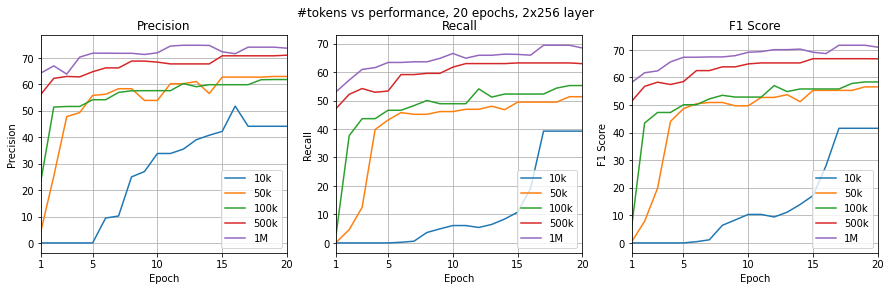

In [ ]:
# number of tokens vs performance for 2x256 network 20 epochs
fig = plt.figure(figsize=(15, 4))
fig.suptitle("#tokens vs performance, 20 epochs, 2x256 layer")
experiments = ("token_10k", "token_50k", "token_100k", "token_500k", "token_1M")
legends = ("10k", "50k", "100k", "500k", "1M")
plt.subplot(1, 3, 1)
x = list(range(1, 21))
for exp in experiments:
    y = lstm_2_256[exp]
    plt.plot(x, y.precision)
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.title("Precision")
plt.grid()
plt.xlim([1, 20])
plt.xticks([1, 5, 10, 15, 20])
plt.legend(legends)

plt.subplot(1, 3, 2)
for exp in experiments:
    y = lstm_2_256[exp]
    plt.plot(x, y.recall)
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.title("Recall")
plt.grid()
plt.xlim([1, 20])
plt.xticks([1, 5, 10, 15, 20])
plt.legend(legends)

plt.subplot(1, 3, 3)
for exp in experiments:
    y = lstm_2_256[exp]
    plt.plot(x, y.f1)
plt.xlabel("Epoch")
plt.ylabel("F1 Score")
plt.title("F1 Score")
plt.grid()
plt.xlim([1, 20])
plt.xticks([1, 5, 10, 15, 20])
plt.legend(legends)

plt.show()

In [ ]:
script = get_run_script(num_tokens=10e3, num_epochs=20, model_name="10k_20_bg")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 20 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/10k_20_bg" --train <(head -n 10000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/10k_20_bg', num_epochs=20, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay=0

In [ ]:
script = get_run_script(num_tokens=50e3, num_epochs=20, model_name="50k_20_bg")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 20 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/50k_20_bg" --train <(head -n 50000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/50k_20_bg', num_epochs=20, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay=0

In [ ]:
script = get_run_script(num_tokens=100e3, num_epochs=20, model_name="100k_20_bg")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 20 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/100k_20_bg" --train <(head -n 100000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/100k_20_bg', num_epochs=20, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_deca

In [ ]:
script = get_run_script(num_tokens=500e3, num_epochs=20, model_name="500k_20_bg")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 20 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/500k_20_bg" --train <(head -n 500000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/500k_20_bg', num_epochs=20, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_deca

In [ ]:
script = get_run_script(num_tokens=10e6, num_epochs=20, model_name="1M_20_bg")
SCRIPT_FILE.write_text(script)
! cat NeuroNLP2/experiments/run_script.sh
! cd NeuroNLP2/experiments && bash run_script.sh

#!/usr/bin/env bash
CUDA_VISIBLE_DEVICES=0 OMP_NUM_THREADS=60 python ner.py --config "quaero-100-demi.json" --num_epochs 20 --batch_size 16 --loss_type sentence --optim sgd --learning_rate 0.01 --lr_decay 0.99999 --grad_clip 0.0 --warmup_steps 10 --weight_decay 0.0 --unk_replace 0.0 --embedding sskip --embedding_dict "../../QUAERO_FrenchPress-w2v.vec.gz" --model_path "../models/1M_20_bg" --train <(head -n 10000000 "../../QUAERO_FrenchPress/fra4_ID.train") --dev "../../QUAERO_FrenchPress/fra4_ID.dev" --test "../../QUAERO_FrenchPress/fra4_ID.test"
Namespace(amsgrad=False, batch_size=16, config='quaero-100-demi.json', cuda=True, dev='../../QUAERO_FrenchPress/fra4_ID.dev', embedding='sskip', embedding_dict='../../QUAERO_FrenchPress-w2v.vec.gz', grad_clip=0.0, learning_rate=0.01, loss_type='sentence', lr_decay=0.99999, model_path='../models/1M_20_bg', num_epochs=20, optim='sgd', test='../../QUAERO_FrenchPress/fra4_ID.test', train='/dev/fd/63', unk_replace=0.0, warmup_steps=10, weight_decay=

## Results regarding type of entity

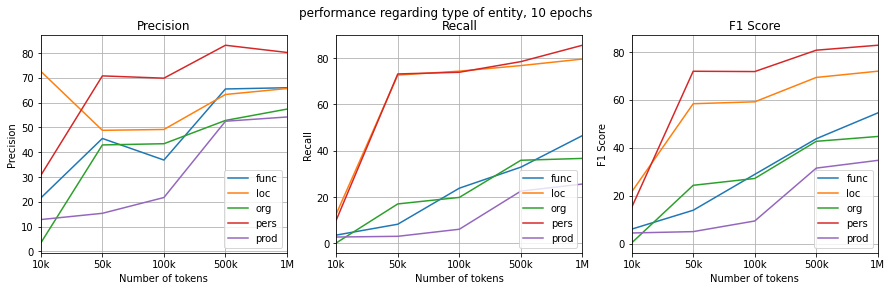

In [ ]:
# regarding number of tokens, for 10 epochs
x_ticks = ("10k", "50k", "100k", "500k", "1M")
labels = ("func", "loc", "org", "pers", "prod")

func_prec = [21.57, 45.54, 36.84, 65.48, 65.98]
func_recall = [3.57, 8.27, 23.82, 32.90, 46.52]
func_f1 = [6.12, 13.99, 28.94, 43.80, 54.56]

loc_prec = [72.58, 48.82, 49.16, 63.26, 65.66]
loc_recall = [12.69, 72.64, 74.33, 76.73, 79.55]
loc_f1 = [21.61, 58.39, 59.18, 69.34, 71.94]

org_prec = [3.45, 42.93, 43.42, 52.80, 57.37]
org_recall = [0.20, 17.03, 19.84, 35.87, 36.67]
org_f1 = [0.38, 24.39, 27.24, 42.72, 44.74]

pers_prec = [30.67, 70.75, 69.83, 83.10, 80.19]
pers_recall = [10.05, 73.12, 73.85, 78.44, 85.51]
pers_f1 = [15.14, 71.92, 71.79, 80.70, 82.76]

prod_prec = [12.86, 15.38, 21.74, 52.48, 54.19]
prod_recall = [2.74, 3.05, 6.1, 22.56, 25.61]
prod_f1 = [4.52, 5.09, 9.52, 31.56, 34.78]

fig = plt.figure(figsize=(15, 4))
fig.suptitle("performance regarding type of entity, 10 epochs")

plt.subplot(1, 3, 1)
x = list(range(1, 6))

for y in (func_prec, loc_prec, org_prec, pers_prec, prod_prec):
    plt.plot(x, y)

plt.xlabel("Number of tokens")
plt.ylabel("Precision")
plt.xticks(x, x_ticks)
plt.grid()
plt.xlim([1, 5])
plt.title("Precision")
plt.legend(labels)

plt.subplot(1, 3, 2)
for y in (func_recall, loc_recall, org_recall, pers_recall, prod_recall):
    plt.plot(x, y)

plt.xlabel("Number of tokens")
plt.ylabel("Recall")
plt.xticks(x, x_ticks)
plt.grid()
plt.xlim([1, 5])
plt.title("Recall")
plt.legend(labels)

plt.subplot(1, 3, 3)
for y in (func_f1, loc_f1, org_f1, pers_f1, prod_f1):
    plt.plot(x, y)

plt.xlabel("Number of tokens")
plt.ylabel("F1 Score")
plt.xticks(x, x_ticks)
plt.grid()
plt.xlim([1, 5])
plt.title("F1 Score")
plt.legend(labels)

plt.show()

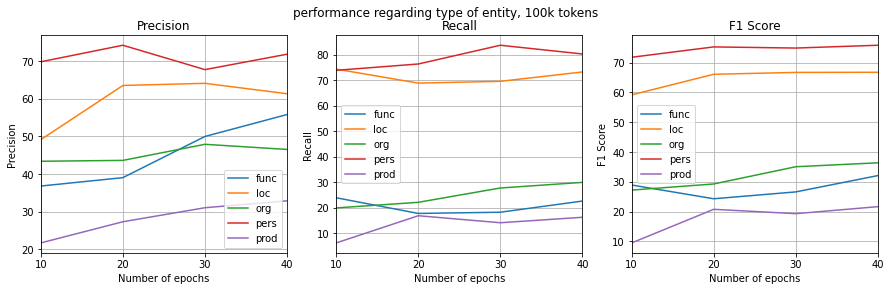

In [ ]:
# regarding number of epochs, 100k tokens
x_ticks = ("10", "20", "30", "40")
labels = ("func", "loc", "org", "pers", "prod")

func_prec = [36.84, 39.07, 50.0, 55.82]
func_recall = [23.82, 17.67, 18.15, 22.53]
func_f1 = [28.94, 24.33, 26.63, 32.10]

loc_prec = [49.16, 63.54, 64.11, 61.35]
loc_recall = [74.33, 68.83, 69.53, 73.20]
loc_f1 = [59.18, 66.08, 66.71, 66.75]

org_prec = [43.42, 43.65, 47.92, 46.56]
org_recall = [19.84, 22.04, 27.66, 29.86]
org_f1 = [27.24, 29.29, 35.07, 36.39]

pers_prec = [69.83, 74.22, 67.75, 71.84]
pers_recall = [73.85, 76.33, 83.69, 80.26]
pers_f1 = [71.79, 75.26, 74.88, 75.82]

prod_prec = [21.74, 27.36, 31.08, 32.92]
prod_recall = [6.1, 16.77, 14.02, 16.16]
prod_f1 = [9.52, 20.79, 19.33, 21.68]


fig = plt.figure(figsize=(15, 4))
fig.suptitle("performance regarding type of entity, 100k tokens")

plt.subplot(1, 3, 1)
x = list(range(1, 5))

for y in (func_prec, loc_prec, org_prec, pers_prec, prod_prec):
    plt.plot(x, y)

plt.xlabel("Number of epochs")
plt.ylabel("Precision")
plt.xticks(x, x_ticks)
plt.grid()
plt.xlim([1, 4])
plt.title("Precision")
plt.legend(labels)

plt.subplot(1, 3, 2)
for y in (func_recall, loc_recall, org_recall, pers_recall, prod_recall):
    plt.plot(x, y)

plt.xlabel("Number of epochs")
plt.ylabel("Recall")
plt.xticks(x, x_ticks)
plt.grid()
plt.xlim([1, 4])
plt.title("Recall")
plt.legend(labels)

plt.subplot(1, 3, 3)
for y in (func_f1, loc_f1, org_f1, pers_f1, prod_f1):
    plt.plot(x, y)

plt.xlabel("Number of epochs")
plt.ylabel("F1 Score")
plt.xticks(x, x_ticks)
plt.grid()
plt.xlim([1, 4])
plt.title("F1 Score")
plt.legend(labels)

plt.show()

In [ ]:
# Results regarding type of entity copied from temporary files
"""
Experiments for varying token numbers, 10 epochs

10k tokens
processed 95807 tokens with 3526 phrases; found: 775 phrases; correct: 260.
accuracy:  93.99%; precision:  33.55%; recall:   7.37%; FB1:  12.09
             func: precision:  21.57%; recall:   3.57%; FB1:   6.12  102
              loc: precision:  72.58%; recall:  12.69%; FB1:  21.61  124
              org: precision:   3.45%; recall:   0.20%; FB1:   0.38  29
             pers: precision:  30.67%; recall:  10.05%; FB1:  15.14  450
             prod: precision:  12.86%; recall:   2.74%; FB1:   4.52  70

50k tokens
processed 95807 tokens with 3526 phrases; found: 2849 phrases; correct: 1665.
accuracy:  96.12%; precision:  58.44%; recall:  47.22%; FB1:  52.24
             func: precision:  45.54%; recall:   8.27%; FB1:  13.99  112
              loc: precision:  48.82%; recall:  72.64%; FB1:  58.39  1055
              org: precision:  42.93%; recall:  17.03%; FB1:  24.39  198
             pers: precision:  70.75%; recall:  73.12%; FB1:  71.92  1419
             prod: precision:  15.38%; recall:   3.05%; FB1:   5.09  65

100k tokens
processed 95807 tokens with 3526 phrases; found: 3243 phrases; correct: 1807.
accuracy:  96.37%; precision:  55.72%; recall:  51.25%; FB1:  53.39
             func: precision:  36.84%; recall:  23.82%; FB1:  28.94  399
              loc: precision:  49.16%; recall:  74.33%; FB1:  59.18  1072
              org: precision:  43.42%; recall:  19.84%; FB1:  27.24  228
             pers: precision:  69.83%; recall:  73.85%; FB1:  71.79  1452
             prod: precision:  21.74%; recall:   6.10%; FB1:   9.52  92

500k tokens
processed 95807 tokens with 3526 phrases; found: 2946 phrases; correct: 2077.
accuracy:  97.01%; precision:  70.50%; recall:  58.91%; FB1:  64.18
             func: precision:  65.48%; recall:  32.90%; FB1:  43.80  310
              loc: precision:  63.26%; recall:  76.73%; FB1:  69.34  860
              org: precision:  52.80%; recall:  35.87%; FB1:  42.72  339
             pers: precision:  83.10%; recall:  78.44%; FB1:  80.70  1296
             prod: precision:  52.48%; recall:  22.56%; FB1:  31.56  141

1M tokens
processed 95807 tokens with 3526 phrases; found: 3232 phrases; correct: 2292.
accuracy:  97.31%; precision:  70.92%; recall:  65.00%; FB1:  67.83
             func: precision:  65.98%; recall:  46.52%; FB1:  54.56  435
              loc: precision:  65.66%; recall:  79.55%; FB1:  71.94  859
              org: precision:  57.37%; recall:  36.67%; FB1:  44.74  319
             pers: precision:  80.19%; recall:  85.51%; FB1:  82.76  1464
             prod: precision:  54.19%; recall:  25.61%; FB1:  34.78  155


Experiments for varying number of epochs, 100k tokens

20 epochs
processed 95807 tokens with 3526 phrases; found: 2912 phrases; correct: 1810.
accuracy:  96.46%; precision:  62.16%; recall:  51.33%; FB1:  56.23
             func: precision:  39.07%; recall:  17.67%; FB1:  24.33  279
              loc: precision:  63.54%; recall:  68.83%; FB1:  66.08  768
              org: precision:  43.65%; recall:  22.04%; FB1:  29.29  252
             pers: precision:  74.22%; recall:  76.33%; FB1:  75.26  1412
             prod: precision:  27.36%; recall:  16.77%; FB1:  20.79  201

30 epochs
processed 95807 tokens with 3526 phrases; found: 3125 phrases; correct: 1938.
accuracy:  96.58%; precision:  62.02%; recall:  54.96%; FB1:  58.28
             func: precision:  50.00%; recall:  18.15%; FB1:  26.63  224
              loc: precision:  64.11%; recall:  69.53%; FB1:  66.71  769
              org: precision:  47.92%; recall:  27.66%; FB1:  35.07  288
             pers: precision:  67.75%; recall:  83.69%; FB1:  74.88  1696
             prod: precision:  31.08%; recall:  14.02%; FB1:  19.33  148

40 epochs
processed 95807 tokens with 3526 phrases; found: 3110 phrases; correct: 1962.
accuracy:  96.65%; precision:  63.09%; recall:  55.64%; FB1:  59.13
             func: precision:  55.82%; recall:  22.53%; FB1:  32.10  249
              loc: precision:  61.35%; recall:  73.20%; FB1:  66.75  846
              org: precision:  46.56%; recall:  29.86%; FB1:  36.39  320
             pers: precision:  71.84%; recall:  80.26%; FB1:  75.82  1534
             prod: precision:  32.92%; recall:  16.16%; FB1:  21.68  161

"""